In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sb 
# Rozmiar wykresu odpowiedni do wyświetlania online
plt.rcParams['figure.figsize'] = (12.0, 10.0)
pd.set_option("display.max_columns",None)

In [2]:
df_stores = pd.read_csv(r"./stores_data_set.csv")
df_sales = pd.read_csv(r"./sales_data_set.csv")
df_features = pd.read_csv(r"./features_data_set.csv")

In [3]:
df_features.info()
df_features.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


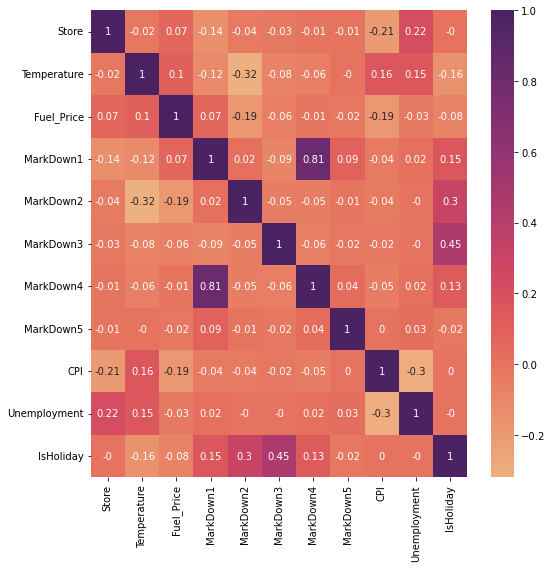

In [29]:
fig, ax = plt.subplots(figsize=[8,8])
sb.heatmap(df_features.corr().round(2),annot=True,cmap='flare')
plt.tight_layout()

In [52]:



# for i in df_features['Store']:
#     plt.scatter(df_features[df_features['Store'] == i]['Date'],df_features[df_features['Store'] == i]['CPI'])
    
# plt.show()

#plt.scatter(df_features[df_features['Store'] == 22]['Date'],df_features[df_features['Store'] == 22]['CPI'])

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
3640,21,05/02/2010,39.05,2.572,NaN,NaN,NaN,NaN,NaN,210.752605,8.324,False
3641,21,12/02/2010,37.77,2.548,NaN,NaN,NaN,NaN,NaN,210.897994,8.324,True
3642,21,19/02/2010,39.75,2.514,NaN,NaN,NaN,NaN,NaN,210.945160,8.324,False
3643,21,26/02/2010,45.31,2.561,NaN,NaN,NaN,NaN,NaN,210.975957,8.324,False
3644,21,05/03/2010,48.61,2.625,NaN,NaN,NaN,NaN,NaN,211.006754,8.324,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3817,21,28/06/2013,86.80,3.495,4146.88,121.56,5.00,4132.68,4534.76,NaN,NaN,False
3818,21,05/07/2013,81.20,3.422,11620.28,769.91,436.44,15124.37,2398.91,NaN,NaN,False
3819,21,12/07/2013,87.30,3.400,5957.24,869.64,24.84,2078.04,3709.36,NaN,NaN,False
3820,21,19/07/2013,79.15,3.556,2598.78,577.75,115.70,843.79,2367.15,NaN,NaN,False


In [24]:
df_stores.info()
df_stores.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [25]:
df_sales.info()
df_sales.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [ ]:
df_sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [112]:
len(df_sales.groupby('Dept'))

81

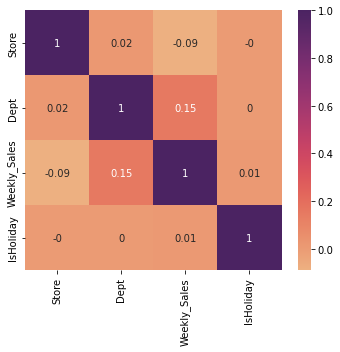

In [82]:
fig, ax = plt.subplots(figsize=[5,5])
sb.heatmap(df_sales.corr().round(2),annot=True,cmap='flare')
plt.tight_layout()

In [73]:
sum(df_sales[df_sales['IsHoliday'] == True]['Weekly_Sales'])

505299551.56000257

In [65]:
data_date = df_features.groupby(['Date']).agg({'CPI' :'mean','Fuel_Price':'mean', 'Unemployment':'mean', 'IsHoliday': 'sum', 'Temperature':'mean'})
data_date_tmp = data_date[:'2012-12-10']
data_sales = df_sales.groupby(['Date']).agg({'Weekly_Sales':'sum'})

data = pd.merge(data_sales,data_date_tmp,left_index=True,right_index=True,how='left')
data["IsHoliday"] = data["IsHoliday"].apply(lambda x: 1 if x == 45 else 0)
data

,Weekly_Sales,CPI,Fuel_Price,Unemployment,IsHoliday,Temperature
Date,,,,,,
01/04/2011,43458991.19,170.725418,3.602356,8.150133,0,48.736444
01/06/2012,48281649.72,175.603188,3.750822,7.419533,0,72.943778
01/07/2011,47578519.50,171.395827,3.675978,8.097489,0,78.759111
01/10/2010,42239875.87,168.354706,2.734333,8.475289,0,69.868000
02/03/2012,46861034.97,174.921137,3.696022,7.508333,0,45.486444
...,...,...,...,...,...,...
30/07/2010,44630363.42,NaN,NaN,NaN,0,NaN
30/09/2011,42195830.81,NaN,NaN,NaN,0,NaN
30/12/2011,46042461.04,NaN,NaN,NaN,0,NaN


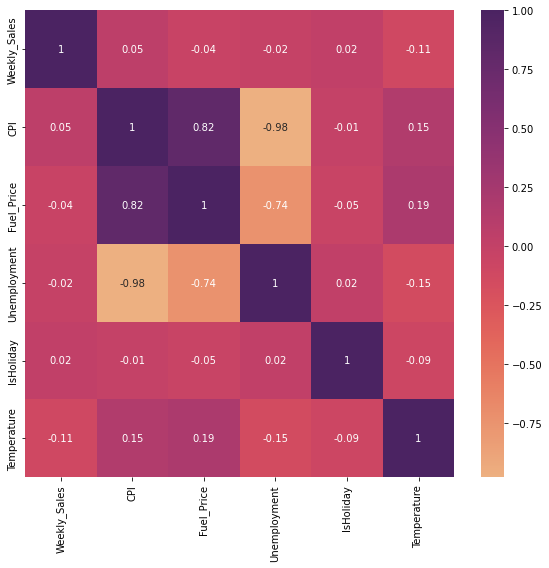

In [66]:
fig, ax = plt.subplots(figsize=[8,8])
sb.heatmap(data.corr().round(2),annot=True,cmap='flare')
plt.tight_layout()

In [67]:
columns = ["Weekly_Sales","CPI","Fuel_Price","Unemployment","IsHoliday",'Temperature']
#columns = ["Weekly_Sales","CPI","IsHoliday","Fuel_Price"]
data[columns]

,Weekly_Sales,CPI,Fuel_Price,Unemployment,IsHoliday,Temperature
Date,,,,,,
01/04/2011,43458991.19,170.725418,3.602356,8.150133,0,48.736444
01/06/2012,48281649.72,175.603188,3.750822,7.419533,0,72.943778
01/07/2011,47578519.50,171.395827,3.675978,8.097489,0,78.759111
01/10/2010,42239875.87,168.354706,2.734333,8.475289,0,69.868000
02/03/2012,46861034.97,174.921137,3.696022,7.508333,0,45.486444
...,...,...,...,...,...,...
30/07/2010,44630363.42,NaN,NaN,NaN,0,NaN
30/09/2011,42195830.81,NaN,NaN,NaN,0,NaN
30/12/2011,46042461.04,NaN,NaN,NaN,0,NaN


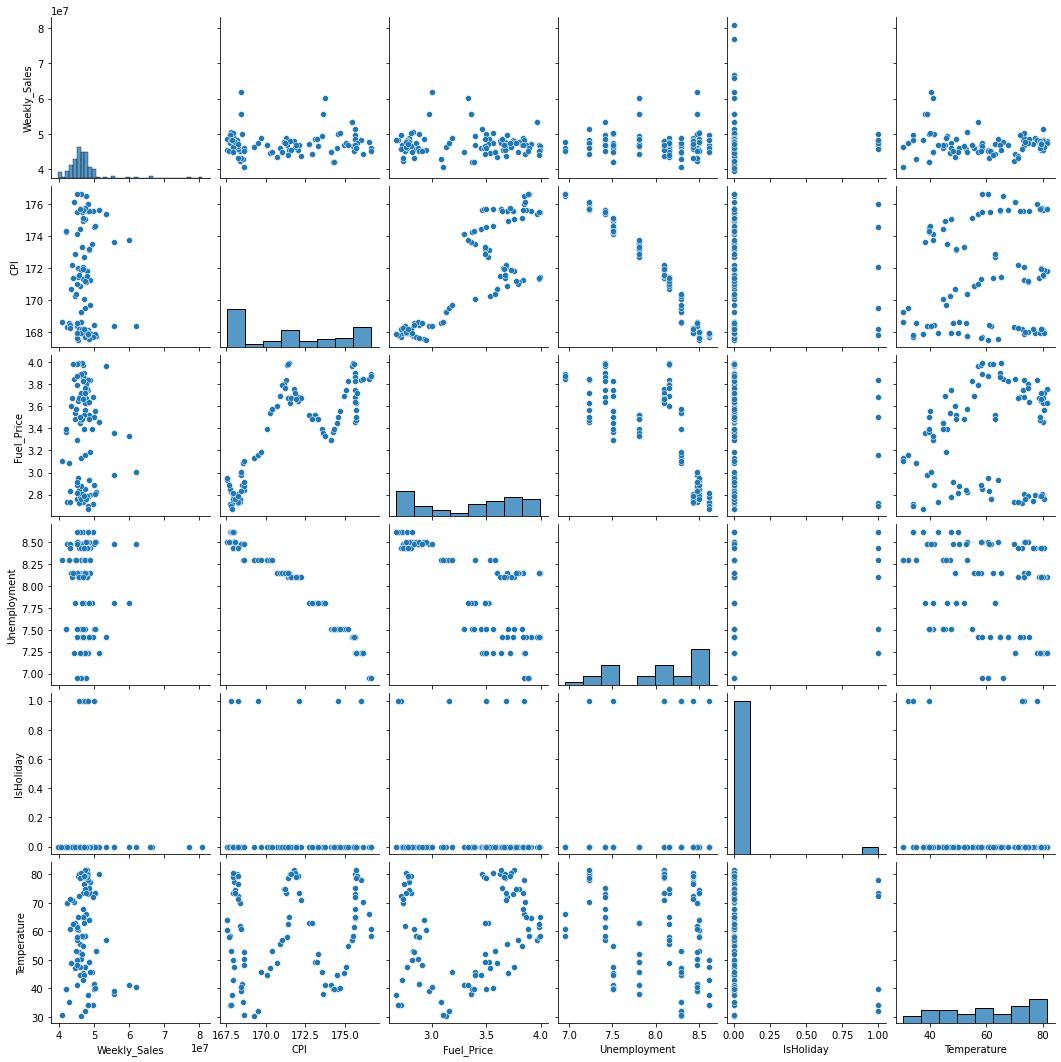

In [68]:
sb.pairplot(data[columns])

In [116]:
df_stores['Type'] = df_stores['Type'].apply(lambda x: 0 if x == 'A' else 1 if x == 'B' else 2)
df_features2 = df_features
df_features2["IsHoliday"] = df_features2["IsHoliday"].apply(lambda x: 1 if x == 45 else 0)
sales_date_store = df_sales.groupby(['Date','Store']).agg({'Weekly_Sales':'sum'})
sales_date_store.sort_index(inplace=True)
#sales_date_store.head()

data_table = pd.merge(df_features2,sales_date_store,how='left', on=['Date','Store'])
data_table = pd.merge(data_table,df_stores[['Store','Type']], how='left', on=['Store'])
data_table = data_table.fillna(0)
data_table = data_table.drop("Date", axis = 1)
data_table.head()


,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Weekly_Sales,Type
0,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,1643690.90,2
1,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,1641957.44,2
2,1,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,1611968.17,2
3,1,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,1409727.59,2
4,1,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,1554806.68,2


In [ ]:
column = ['Store','Weekly_Sales','MarkDown1','MarkDown2']
sb.pairplot(data_table)